In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('merged_final_customer.csv')
df.head()

C:\Users\HaiderAli\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (21,39) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Cust Type,Customer No.,Insurance Company,Invoice Date,Job Card No,JobCard Date,JobCard Time,KMs Reading,Labour Total,...,Year,Month,Business Partner,Partner Type,Data Origin,Title,Marital Status,Occupation,Date of Birth,Death date
0,0,Retail,67849,NaN,2015-01-02,168303,2014-12-13,14:29:43,49317,1203.14,...,2014,12,71941,1.0,Reference - Used car dealer,2.0,NaN,NaN,NaN,NaN
1,1,Retail,67849,NaN,2014-08-14,136482,2014-08-08,15:26:53,45575,989.98,...,2014,8,71941,1.0,Reference - Used car dealer,2.0,NaN,NaN,NaN,NaN
2,2,Retail,67849,NaN,2014-08-16,135895,2014-08-06,12:49:48,45575,6473.05,...,2014,8,71941,1.0,Reference - Used car dealer,2.0,NaN,NaN,NaN,NaN
3,3,Retail,67849,NaN,2014-10-09,150383,2014-10-06,11:40:52,47556,0.00,...,2014,10,71941,1.0,Reference - Used car dealer,2.0,NaN,NaN,NaN,NaN
4,4,Retail,67849,NaN,2014-12-31,168210,2014-12-13,12:14:37,49317,1760.02,...,2014,12,71941,1.0,Reference - Used car dealer,2.0,NaN,NaN,NaN,NaN


In [3]:
df = df.rename(columns={'Total Amt Wtd Tax.': 'Total_Amt_Wtd_Tax'})

In [4]:
df.columns

Index(['Unnamed: 0', 'Cust Type', 'Customer No.', 'Insurance Company',
       'Invoice Date', 'Job Card No', 'JobCard Date', 'JobCard Time',
       'KMs Reading', 'Labour Total', 'Make', 'Misc Total', 'Model',
       'OSL Total', 'Order Type', 'Parts Total', 'Pin code', 'Plant',
       'Plant Name1', 'Print Status', 'Recovrbl Exp', 'Technician Name',
       'Total_Amt_Wtd_Tax', 'Total Value', 'User ID', 'Invoice_DateTime',
       'JobCard_DateTime', 'Service_Time', 'City', 'State', 'Year', 'Month',
       'Partner Type', 'Data Origin', 'Title'],
      dtype='object')

# -Which marketing source is responsible in bringing which type of customer?

In [5]:
df['Data Origin'].value_counts()[:10].keys()

Index(['Z005', 'Z006', 'Z001', 'Z002', 'Z021', 'Z019', 'Z004', 'Z018', 'Z008',
       'Z013'],
      dtype='object')

In [6]:
df['Data Origin'].value_counts()[:10]

Z005    78181
Z006    65916
Z001    58301
Z002    29881
Z021    21243
Z019    18683
Z004    17910
Z018    13473
Z008    12451
Z013     8522
Name: Data Origin, dtype: int64

In [7]:
# df['Data Origin'] = df['Data Origin'].replace(['Z005', 'Z006', 'Z001', 'Z002', 'Z021', 'Z019', 'Z004', 'Z018', 'Z008',
#        'Z013'],['Reference Customer','Reference Employee','Camp Outdoor','Camp - Workshop','Other outdoor activity','Spotted the outlet','Fleet','Outdoor Sales Activity','Just Dial/Other helpline','Hoardings/Outdoor Advertisements'
#             ])

/home/tushar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


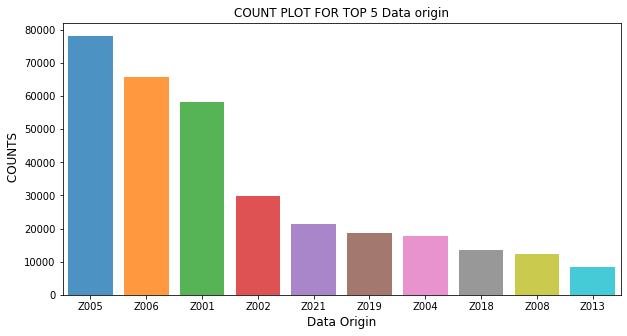

In [8]:

data_origin_counts  = df['Data Origin'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(data_origin_counts.index[:10], data_origin_counts.values[:10], alpha=0.8,saturation=50)
plt.title('COUNT PLOT FOR TOP 5 Data origin')
plt.ylabel(' COUNTS', fontsize=12)
plt.xlabel('Data Origin', fontsize=12)
plt.show()

#  top 10  'Data Origin'           top 5     'Order Type'

In [9]:
df1=df[df['Data Origin'].isin(['Z005','Z006','Z001','Z002','Z021','Z019','Z004','Z018','Z008','Z013'])]
df1=df1.loc[df1['Order Type'].isin(['Paid Service', 'Running Repairs',
       'SMC Redemption', 'Accidental',
       'Mechanical'])]
df1['Data Origin'].unique()

array(['Z001', 'Z005', 'Z018', 'Z021', 'Z006', 'Z008', 'Z002', 'Z013',
       'Z004', 'Z019'], dtype=object)

In [10]:
df1['Order Type'].unique()

array(['SMC Redemption', 'Running Repairs', 'Paid Service', 'Accidental',
       'Mechanical'], dtype=object)

In [11]:
df1.groupby(['Data Origin','Order Type']).size().unstack()

Order Type,Accidental,Mechanical,Paid Service,Running Repairs,SMC Redemption
Data Origin,,,,,
Z001,4259,958,15405,32046,3516
Z002,1525,802,7903,16762,1834
Z004,1433,574,4299,10891,438
Z005,7069,3081,23346,41233,2097
Z006,7280,2270,17573,37278,901
Z008,1062,133,3672,6818,472
Z013,584,219,2601,4744,232
Z018,705,409,3224,8368,453
Z019,2181,724,4243,11094,258


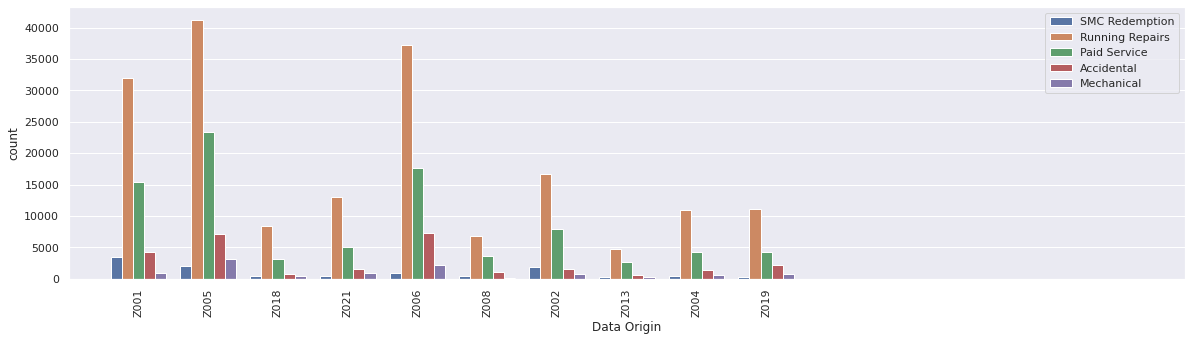

In [12]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(20, 5))
sns.countplot(x="Data Origin", data=df1, hue='Order Type')
plt.xlim(-1, 15)
plt.legend(loc='upper right')
plt.xticks(rotation='vertical')
plt.show()

# top 10 Data origin title

In [13]:
df2=df[df['Data Origin'].isin(['Z005','Z006','Z001','Z002','Z021','Z019','Z004','Z018','Z008','Z013'])]

df2['Data Origin'].unique()

array(['Z001', 'Z005', 'Z018', 'Z021', 'Z006', 'Z008', 'Z002', 'Z013',
       'Z004', 'Z019'], dtype=object)

In [14]:
df2.groupby(['Data Origin','Title']).size().unstack()

Title,1.0,2.0
Data Origin,,
Z001,2626,55675
Z002,1293,28588
Z004,857,17053
Z005,3886,74295
Z006,3734,62182
Z008,311,12140
Z013,316,8206
Z018,459,13014
Z019,641,18042


NameError: name 'df2' is not defined

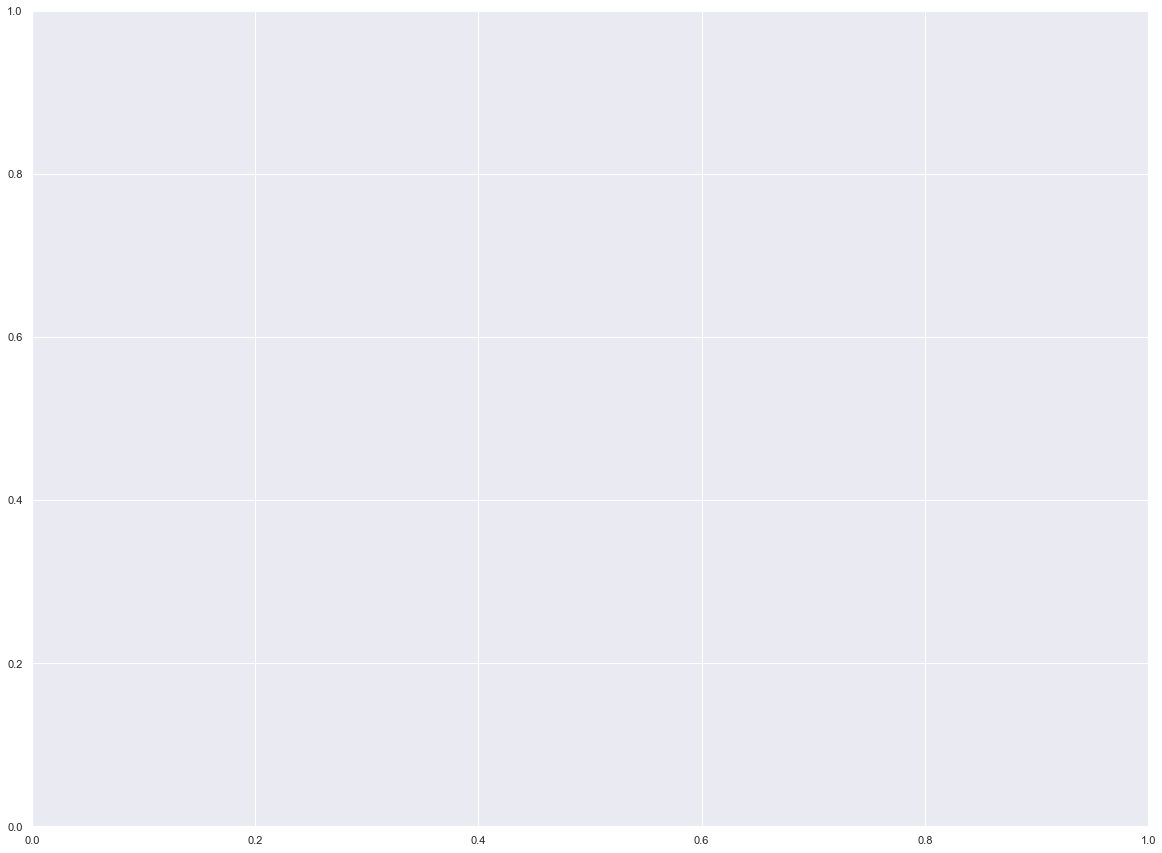

In [4]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(20, 15))
sns.countplot(x="Data Origin", data=df2, hue='Title')
plt.xlim(-1, 15)
plt.legend(loc='upper right')
plt.xticks(rotation='vertical')
plt.show()

# -Which marketing source brings the most business?

In [16]:
df3=df[df['Data Origin'].isin(['Z005','Z006','Z001','Z002','Z021','Z019','Z004','Z018','Z008','Z013'])]

df3['Data Origin'].unique()

array(['Z001', 'Z005', 'Z018', 'Z021', 'Z006', 'Z008', 'Z002', 'Z013',
       'Z004', 'Z019'], dtype=object)

In [17]:
df3['Order Type'].unique()

array(['SMC Value Package', 'SMC Redemption', 'Running Repairs',
       'Paid Service', 'Accidental', 'Mechanical', 'WBW Order',
       'Workshop Damage', 'Repeat Order'], dtype=object)

In [18]:
df4=df3.groupby(['Year',"Data Origin"]).Total_Amt_Wtd_Tax.sum().unstack()
df4

Data Origin,Z001,Z002,Z004,Z005,Z006,Z008,Z013,Z018,Z019,Z021
Year,,,,,,,,,,
2012,1.032371e+07,1.104203e+06,4.810681e+05,7.383441e+06,3.374641e+06,2.047383e+06,2.754308e+06,1.161358e+06,9.658539e+05,7.444610e+05
2013,4.240897e+07,7.909862e+06,2.581230e+06,2.336089e+07,1.419809e+07,1.582670e+07,9.486596e+06,6.693084e+06,3.503849e+06,1.494356e+07
2014,7.322617e+07,3.004569e+07,9.529924e+06,5.171319e+07,3.527246e+07,1.949266e+07,5.198521e+06,1.436083e+07,1.373267e+07,1.792153e+07
2015,6.892480e+07,2.746701e+07,1.991793e+07,9.347662e+07,9.697788e+07,1.506647e+07,7.069746e+06,1.271248e+07,2.939467e+07,2.297050e+07
2016,6.252590e+07,4.121028e+07,4.362120e+07,1.925476e+08,1.738936e+08,8.036328e+06,1.200465e+07,1.536108e+07,4.491300e+07,3.061908e+07


<AxesSubplot:xlabel='Month'>

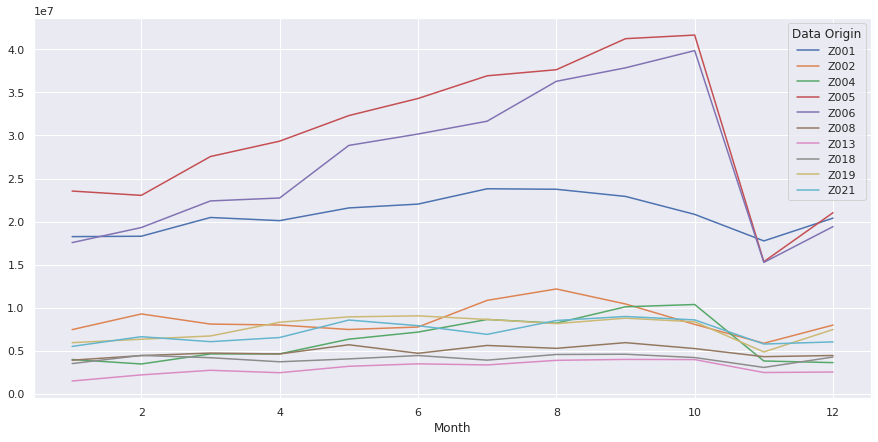

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,7))

df1.groupby(['Month',"Data Origin"]).Total_Amt_Wtd_Tax.sum().unstack().plot(ax=ax)

# -What is the average income per source?

In [21]:
df['Data Origin'].unique()

array(['Z007', 'Z001', 'Z005', 'Z018', 'Z021', 'Z014', 'Z006', 'Z009',
       'Z008', 'Z010', 'Z017', 'Z016', 'Z002', 'Z013', 'Z011', 'Z012',
       'Z004', 'Z020', 'Z019', 'Z003', 'Z015', 'Z022'], dtype=object)

In [26]:
df.groupby('Data Origin').Total_Amt_Wtd_Tax.mean()

Data Origin
Z001     4415.182467
Z002     3605.536524
Z003     3645.619079
Z004     4250.773323
Z005     4713.188443
Z006     4911.047771
Z007     6246.911214
Z008     4856.601290
Z009     3841.768324
Z010     3981.143633
Z011     3654.761049
Z012     2497.773528
Z013     4284.654381
Z014    17203.861185
Z015     4097.415268
Z016     3812.519035
Z017     3601.926503
Z018     3732.563417
Z019     4951.562602
Z020     4362.708321
Z021     4104.840684
Z022     3045.694740
Name: Total_Amt_Wtd_Tax, dtype: float64

/home/tushar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


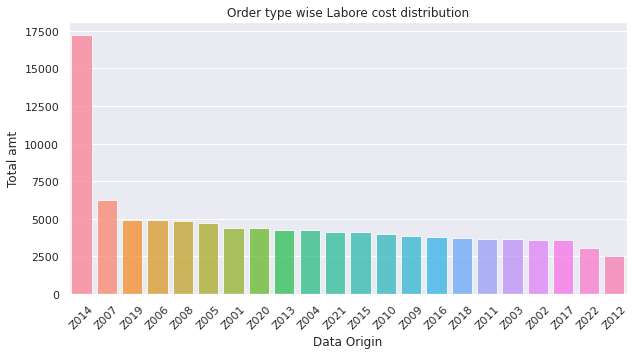

In [31]:
b=df.groupby('Data Origin').Total_Amt_Wtd_Tax.mean().sort_values( ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(b.index, b.values, alpha=0.8,saturation=50)
plt.title('Order type wise Labore cost distribution')
plt.ylabel('Total amt', fontsize=12)
plt.xlabel('Data Origin', fontsize=12)
plt.xticks(rotation=45)
plt.show()

/home/tushar/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


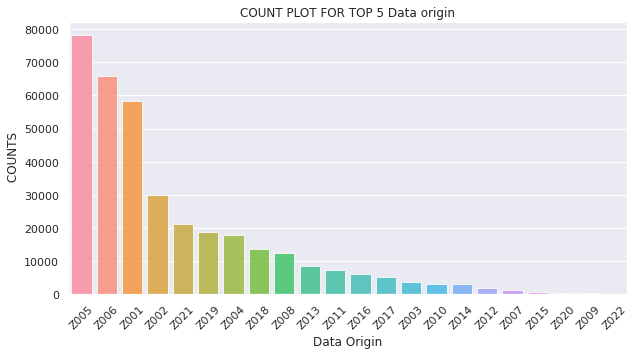

In [33]:

data_origin_counts  = df['Data Origin'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(data_origin_counts.index[:], data_origin_counts.values[:], alpha=0.8,saturation=50)
plt.title('COUNT PLOT FOR TOP 5 Data origin')
plt.ylabel(' COUNTS', fontsize=12)
plt.xlabel('Data Origin', fontsize=12)
plt.xticks(rotation=45)
plt.show()